In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import seaborn as sns
import math 
from datetime import datetime

In [2]:
df = pd.read_csv('../data.csv')
df

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
...,...,...,...,...,...,...,...
3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,https://open.spotify.com/track/71bBFbfn2OBK5Qw...,2018-01-09,hk
3441193,197,Issues,Julia Michaels,2117,https://open.spotify.com/track/7vu0JkJh0ldukEY...,2018-01-09,hk
3441194,198,Tuo Fei Lun,Eason Chan,2112,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-09,hk
3441195,199,面具,Alfred Hui,2102,https://open.spotify.com/track/58SUsgamkW6vFFq...,2018-01-09,hk


# BÀI HÁT ĐƯỢC NGHE NHIỀU NHẤT TRONG THÁNG

In [3]:
the_most_monthly_stream = df[df['Date'] < '2017-02-01']
the_most_monthly_stream

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
...,...,...,...,...,...,...,...
3373192,196,CHEER UP,TWICE,1611,https://open.spotify.com/track/6jIpuClSFwyBoGT...,2017-01-31,hk
3373193,197,The Greatest,Sia,1609,https://open.spotify.com/track/7xHWNBFm6ObGEQP...,2017-01-31,hk
3373194,198,Hymn For The Weekend - Seeb Remix,Coldplay,1597,https://open.spotify.com/track/1OAiWI2oPmglaOi...,2017-01-31,hk
3373195,199,Somebody Else,VÉRITÉ,1594,https://open.spotify.com/track/34i4yxPrHWquuR4...,2017-01-31,hk


In [4]:
dates = pd.date_range('2017-01-01', '2018-02-09', freq='MS')
the_most_monthly_stream = pd.DataFrame([])
for i in range(0, len(dates) - 1):
    temp_the_most_monthly_stream = df[(df['Date'] >= dates[i].strftime('%Y-%m-%d')) & (df['Date'] < dates[i + 1].strftime('%Y-%m-%d'))]
    temp_the_most_monthly_stream = temp_the_most_monthly_stream.loc[temp_the_most_monthly_stream['Streams'].idxmax()]
    the_most_monthly_stream = the_most_monthly_stream.append(temp_the_most_monthly_stream, ignore_index=True)
the_most_monthly_stream
new_dates = []
for i in range(0, len(dates) - 1):
    dates[i].strftime('%m/%Y')
    new_dates.append(dates[i].strftime('%m/%Y'))
the_most_monthly_stream['Date'] = new_dates
the_most_monthly_stream

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17984\152170573.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  the_most_monthly_stream = the_most_monthly_stream.append(temp_the_most_monthly_stream, ignore_index=True)


,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Shape of You,Ed Sheeran,7765131,https://open.spotify.com/track/7qiZfU4dY1lWllz...,01/2017,global
1,1,Shape of You,Ed Sheeran,7985803,https://open.spotify.com/track/7qiZfU4dY1lWllz...,02/2017,global
2,1,Shape of You,Ed Sheeran,9891056,https://open.spotify.com/track/7qiZfU4dY1lWllz...,03/2017,global
3,1,Despacito - Remix,Luis Fonsi,6888677,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,04/2017,global
4,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,11381520,https://open.spotify.com/track/4aWmUDTfIPGksMN...,05/2017,global
5,1,Despacito - Remix,Luis Fonsi,7603132,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,06/2017,global
6,1,Despacito - Remix,Luis Fonsi,6398530,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,07/2017,global
7,1,Look What You Made Me Do,Taylor Swift,7908492,https://open.spotify.com/track/2VjtYe7gpfUi2Ok...,08/2017,global
8,1,rockstar,Post Malone,7156650,https://open.spotify.com/track/1OmcAT5Y8eg5bUP...,09/2017,global
9,1,rockstar,Post Malone,7113735,https://open.spotify.com/track/7wGoVu4Dady5GV0...,10/2017,global


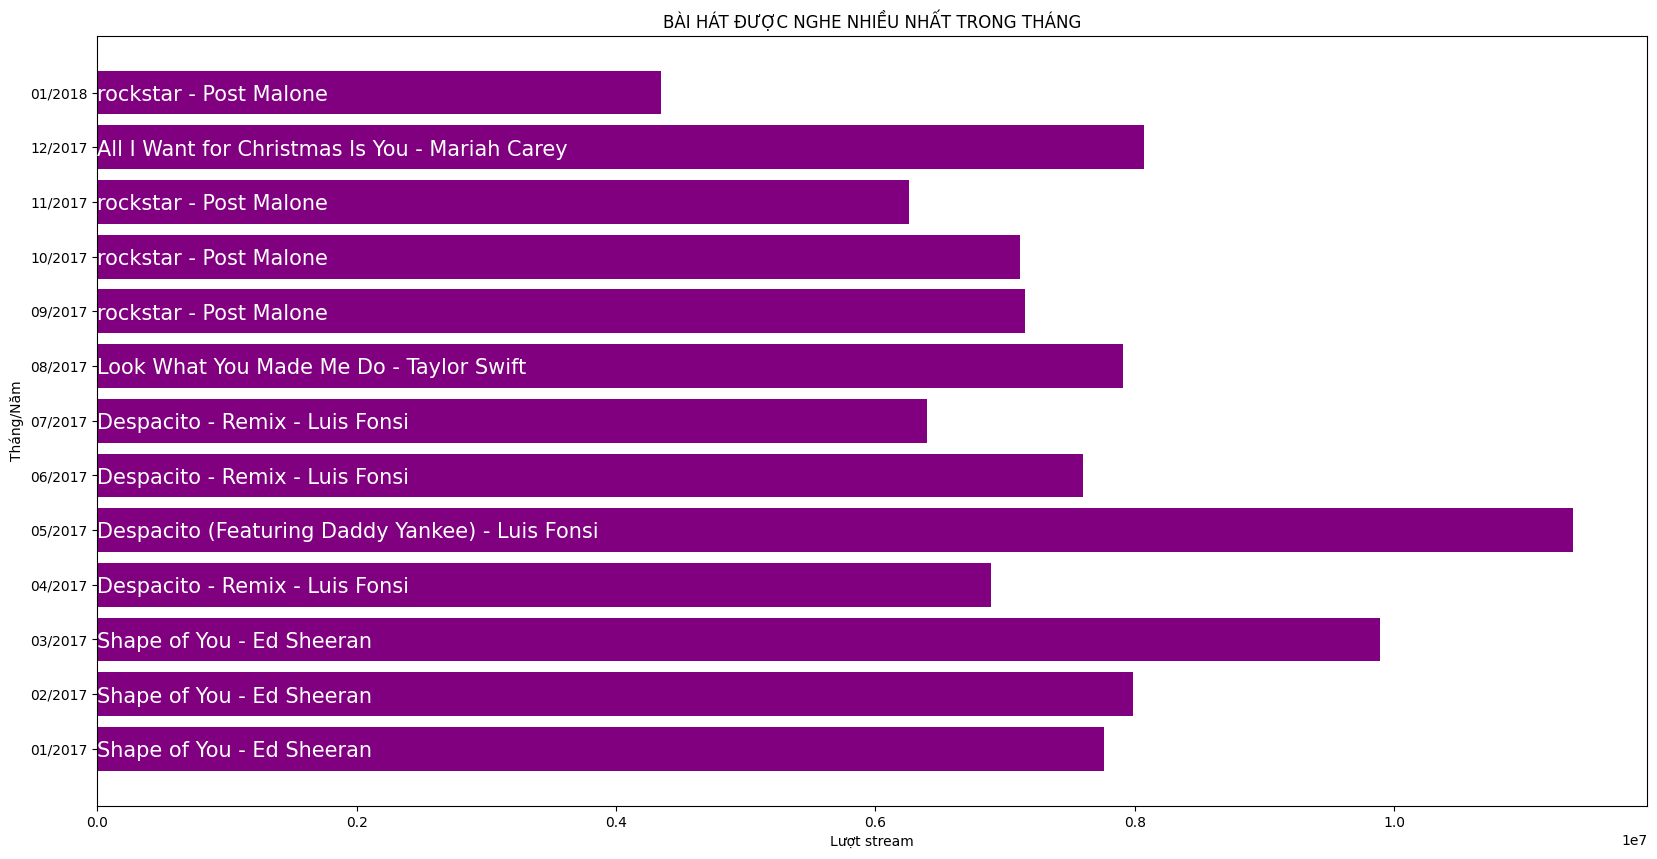

In [5]:
ig = plt.figure(figsize=(20, 10))
 
plt.barh(the_most_monthly_stream['Date'], the_most_monthly_stream['Streams'], color='purple')
 
plt.title("BÀI HÁT ĐƯỢC NGHE NHIỀU NHẤT TRONG THÁNG")
plt.xlabel("Lượt stream")
plt.ylabel("Tháng/Năm")

for index, data in enumerate(the_most_monthly_stream['Streams']):
    plt.text(x=index, y=index - 0.15, s=f"{'{name} - {artist}'.format(name=the_most_monthly_stream['Track Name'][index], artist=the_most_monthly_stream['Artist'][index])}", fontdict=dict(fontsize=15, color='White'))

plt.show()

### TOP 3 BÀI HÁT ĐƯỢC NGHE NHIỀU NHẤT HÀNG THÁNG

In [6]:
dates = pd.date_range('2017-01-01', '2018-02-09', freq='MS')
ranking = pd.DataFrame([])
for i in range(0, len(dates) - 1):
    ranking_3 = df[(df['Date'] >= dates[i].strftime('%Y-%m-%d')) & (df['Date'] < dates[i + 1].strftime('%Y-%m-%d'))]
    ranking_3 = ranking_3.sort_values(by=['Streams'], ascending=False).drop_duplicates(['Track Name', 'Artist']).head(3)
    temp_date = []
    temp_date.append(dates[i].strftime('%m/%Y'))
    temp_date.append(dates[i].strftime('%m/%Y'))
    temp_date.append(dates[i].strftime('%m/%Y'))
    ranking_3['Date'] = temp_date
    temp_position = []
    temp_position.append(1)
    temp_position.append(2)
    temp_position.append(3)
    ranking_3['Position'] = temp_position
    ranking = ranking.append(ranking_3, ignore_index=True)
ranking

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17984\44654710.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ranking = ranking.append(ranking_3, ignore_index=True)


,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Shape of You,Ed Sheeran,7765131,https://open.spotify.com/track/7qiZfU4dY1lWllz...,01/2017,global
1,2,Castle on the Hill,Ed Sheeran,5661820,https://open.spotify.com/track/6PCUP3dWmTjcTtX...,01/2017,global
2,3,Paris,The Chainsmokers,4287637,https://open.spotify.com/track/72jbDTw1piOOj77...,01/2017,global
3,1,Shape of You,Ed Sheeran,7985803,https://open.spotify.com/track/7qiZfU4dY1lWllz...,02/2017,global
4,2,Something Just Like This,The Chainsmokers,4752225,https://open.spotify.com/track/6RUKPb4LETWmmr3...,02/2017,global
5,3,It Ain't Me (with Selena Gomez),Kygo,4636834,https://open.spotify.com/track/3eR23VReFzcdmS7...,02/2017,global
6,1,Shape of You,Ed Sheeran,9891056,https://open.spotify.com/track/7qiZfU4dY1lWllz...,03/2017,global
7,2,Passionfruit,Drake,5626795,https://open.spotify.com/track/7hDc8b7IXETo14h...,03/2017,global
8,3,Castle on the Hill,Ed Sheeran,4783481,https://open.spotify.com/track/6PCUP3dWmTjcTtX...,03/2017,global
9,1,Despacito - Remix,Luis Fonsi,6888677,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,04/2017,global


In [24]:
ranking_top = ranking.pivot(index="Date", columns="Position", values="Track Name").fillna(0).reset_index().rename_axis(None, axis = 1)
for i in range(1, 12):
    temp = ranking_top.iloc[i + 1].copy()
    ranking_top.iloc[i + 1] = ranking_top.iloc[i]
    ranking_top.iloc[i] = temp
ranking_top

,Date,1,2,3
0,01/2017,Shape of You,Castle on the Hill,Paris
1,02/2017,Shape of You,Something Just Like This,It Ain't Me (with Selena Gomez)
2,03/2017,Shape of You,Passionfruit,Castle on the Hill
3,04/2017,Despacito - Remix,Shape of You,HUMBLE.
4,05/2017,Despacito (Featuring Daddy Yankee),Despacito - Remix,I'm the One
5,06/2017,Despacito - Remix,I'm the One,Wild Thoughts
6,07/2017,Despacito - Remix,Mi Gente,Wild Thoughts
7,08/2017,Look What You Made Me Do,Mi Gente,Despacito - Remix
8,09/2017,rockstar,Look What You Made Me Do,Mi Gente
9,10/2017,rockstar,Havana,New Rules


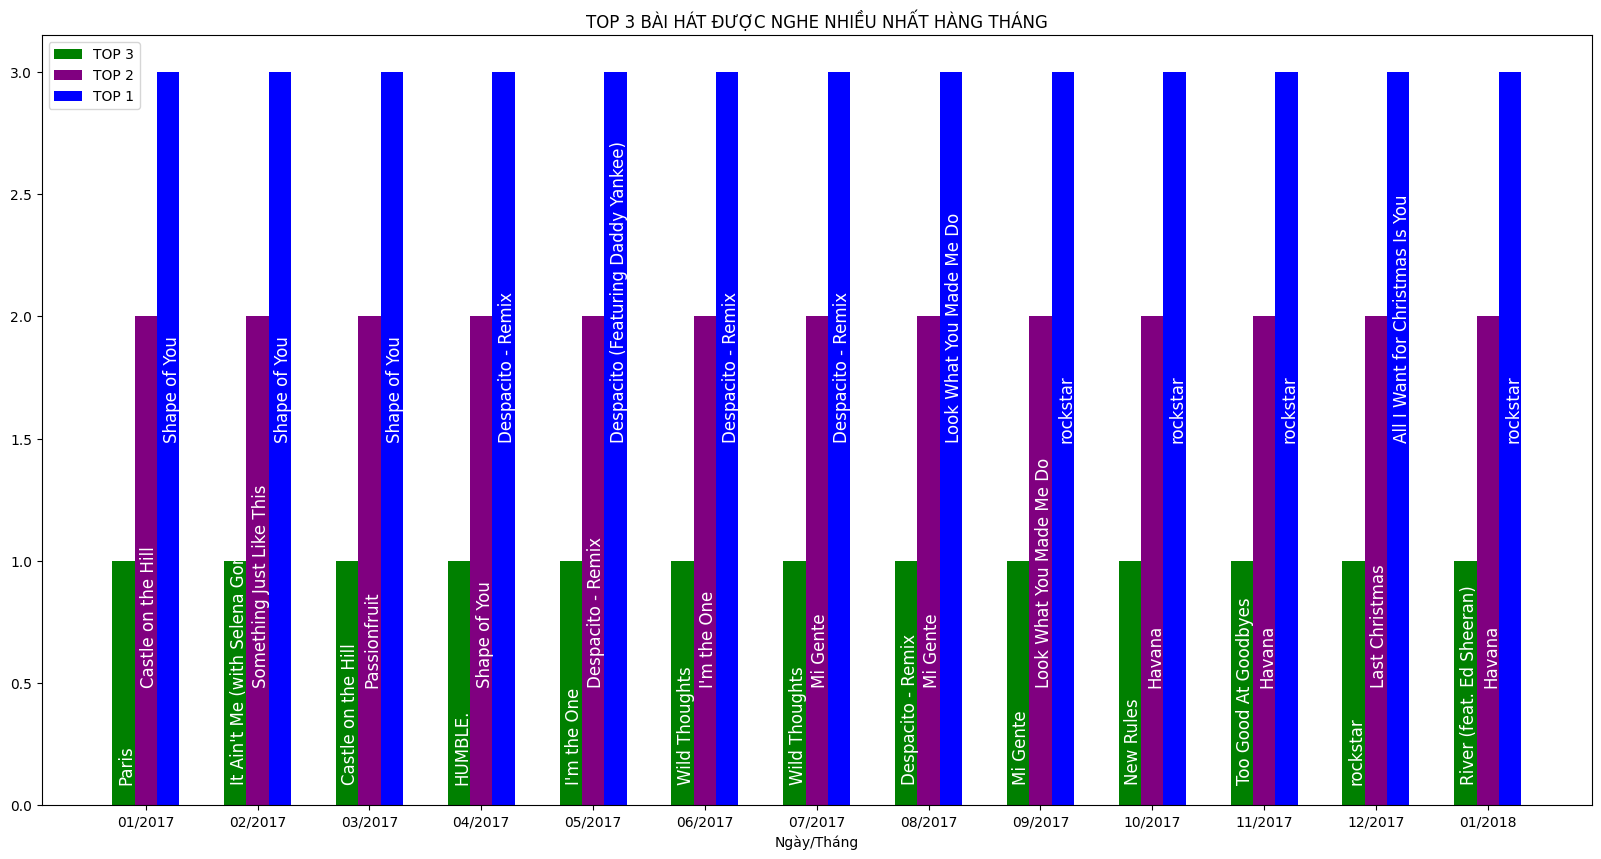

In [20]:
X_axis = np.arange(len(ranking_top.index))
plt.figure(figsize=(20, 10))  # thiết lập size cho bảng
plt.bar(X_axis - 0.2, 1, 0.2, label='TOP 3', color='green')
plt.bar(X_axis, 2, 0.2, label='TOP 2', color='purple')
plt.bar(X_axis + 0.2, 3, 0.2, label='TOP 1', color='blue')
plt.xticks(X_axis, ranking_top['Date'])
plt.title("TOP 3 BÀI HÁT ĐƯỢC NGHE NHIỀU NHẤT HÀNG THÁNG")
plt.xlabel("Ngày/Tháng")

for index, data in enumerate(ranking_top[3]):
    plt.text(x=index - 0.25, y=1 - 0.9,
             s=f"{data}", fontdict=dict(fontsize=12), rotation=90, color='white')

for index, data in enumerate(ranking_top[2]):
    plt.text(x=index - 0.05, y=2 - 1.5,
             s=f"{data}", fontdict=dict(fontsize=12 ), rotation=90, color='white')

for index, data in enumerate(ranking_top[1]):
    plt.text(x=index + 0.15, y=3 - 1.5,
             s=f"{data}", fontdict=dict(fontsize=12 ), rotation=90, color='white')

plt.legend()